# ResNet50 on Cifar10 dataset

#### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


#### Loading the Dataset and performing inbuilt pre-processing

In [2]:
from keras.datasets import mnist,fashion_mnist,cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train).astype(int)
y_test = to_categorical(y_test).astype(int)
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

170500096/170498071 [==============================] - 11s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


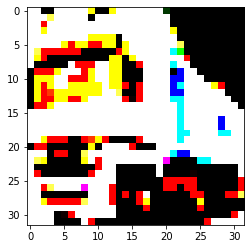

In [3]:
plt.imshow(x_train[1])

#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (139x139)

In [0]:
def resize_data(data):
  data_upscaled = []
  for i, img in enumerate(data):
    large_img = cv2.resize(img, dsize=(139, 139))
    data_upscaled.append(large_img)
  return data_upscaled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


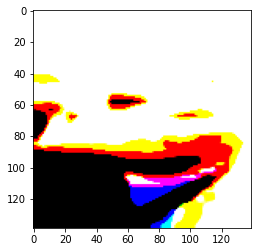

In [5]:
x_train = np.array(resize_data(x_train))
x_test = np.array(resize_data(x_test)) 
plt.imshow(x_test[1])

In [6]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 139, 139, 3) (10000, 139, 139, 3) (50000, 10) (10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


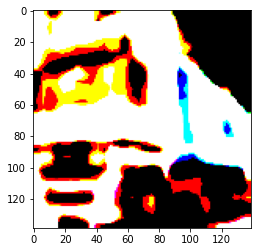

In [7]:
x_test.mean()
plt.imshow(x_train[1])

#### Model Building

In [8]:
base = ResNet50(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step


#### Freezing the layers of base model

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 32,021,386
Trainable params: 8,433,674
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
model.fit(x_train,y_train,epochs=10,batch_size=500,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 260s 5ms/step - loss: 1.5728 - accuracy: 0.6889 - val_loss: 0.7932 - val_accuracy: 0.7613
Epoch 2/10
50000/50000 [==============================] - 247s 5ms/step - loss: 0.6120 - accuracy: 0.7915 - val_loss: 0.8954 - val_accuracy: 0.7678
Epoch 3/10
50000/50000 [==============================] - 247s 5ms/step - loss: 0.5006 - accuracy: 0.8270 - val_loss: 0.5560 - val_accuracy: 0.8344
Epoch 4/10
50000/50000 [==============================] - 247s 5ms/step - loss: 0.4288 - accuracy: 0.8522 - val_loss: 0.7123 - val_accuracy: 0.8077
Epoch 5/10
50000/50000 [==============================] - 247s 5ms/step - loss: 0.3607 - accuracy: 0.8749 - val_loss: 0.7486 - val_accuracy: 0.8057
Epoch 6/10
50000/50000 [==============================] - 247s 5ms/step - loss: 0.3153 - accuracy: 0.8882 - val_loss: 0.8757 - val_accuracy: 0.7917
Epoch 7/10
50000/50000 [==============================] - 247s

#### Performance Evaluation

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss,label_ranking_loss
y_pred = model.predict(x_test)

In [14]:
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [15]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.7881567973311092
Precision for class 1 = 0.9357894736842105
Precision for class 2 = 0.9381443298969072
Precision for class 3 = 0.9050966608084359
Precision for class 4 = 0.7453936348408711
Precision for class 5 = 0.7790802524797115
Precision for class 6 = 0.9392133492252682
Precision for class 7 = 0.7780569514237856
Precision for class 8 = 0.9257688229056203
Precision for class 9 = 0.8787878787878788
Mean Precision =  0.8613488151383798


In [16]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.945
Recall for class 1 = 0.889
Recall for class 2 = 0.728
Recall for class 3 = 0.515
Recall for class 4 = 0.89
Recall for class 5 = 0.864
Recall for class 6 = 0.788
Recall for class 7 = 0.929
Recall for class 8 = 0.873
Recall for class 9 = 0.928
Mean Recall =  0.8349


In [17]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  5.151113111536988
